#### Exploratory Data Analysis:

Let's see how predictive we are if we only look at the demographics

In [1]:
import pandas as pd
import numpy as np
import sys
import random

from matplotlib import pyplot as plt
from statistics import mean, stdev
from sklearn.model_selection import train_test_split

In [2]:
#!pip install openpyxl
survey = pd.read_excel('Retention_Dataset_CLEAN.xlsx')
survey.shape

(941, 61)

In [3]:
survey.columns

Index(['Q4', 'Q6', 'Q7', 'Q8', 'Q9', 'Q21', 'Q20', 'Q21_1', 'Q21_2', 'Q21_3',
       'Q21_11', 'Q21_12', 'Q21_13', 'Q21_14', 'Q21_15', 'Q21_16', 'Q21_17',
       'Q23_2', 'Q23_3', 'Q23_1', 'Q23_4', 'Q22_1', 'Q22_2', 'Q22_3', 'Q22_4',
       'Q22_5', 'Q22_6', 'Q22_8', 'Q22_7', 'Q24_1', 'Q24_2', 'Q24_8', 'Q24_3',
       'Q24_7', 'Q24_4', 'Q24_5', 'Q24_6', 'Q25_4', 'Q25_5', 'Q25_6', 'Q25_7',
       'Q25_8', 'Q25_9', 'Spr_22_Ret', 'Fa_22_Ret',
       'Q27_American Indian or Alaska Native', 'Q27_Asian',
       'Q27_Black or African American', 'Q27_Other', 'Q27_White', 'Q29_Female',
       'Q29_Male', 'Q29_Non-binary / third gender', 'Q29_Prefer not to say',
       'Q30_No', 'Q30_Prefer not to say', 'Q30_Yes',
       'Q22_Off-Campus (with family)', 'Q22_Off-Campus (with friends etc.)',
       'Q22_On-Campus', 'Q22_Other'],
      dtype='object')

### Task 1: Create the training set & the result set

"just_data" will be the matrix of data that contains the survey data for each student.
"y_vals" will be the "matrix" of data that contains the retention result.

Both of these will then be converted into Numpy matrices that we will label "X" and "y."
Using these labels will allow us to reuse the code from the ML course with fewer changes.

In [4]:
just_data = survey[['Q27_American Indian or Alaska Native', 'Q27_Asian',
       'Q27_Black or African American', 'Q27_Other', 'Q27_White', 'Q29_Female',
       'Q29_Male', 'Q29_Non-binary / third gender', 'Q29_Prefer not to say',
       'Q30_No', 'Q30_Prefer not to say', 'Q30_Yes',
       'Q22_Off-Campus (with family)', 'Q22_Off-Campus (with friends etc.)',
       'Q22_On-Campus', 'Q22_Other']]
just_data.shape

y_vals = survey[['Fa_22_Ret']]
y_vals.shape

X = just_data.to_numpy()
y = y_vals.to_numpy()

In [5]:
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0])

print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The first element of X is:  [False False False False  True False  True False False  True False False
 False False  True False]
The first element of y is:  [1]
The shape of X is: (941, 16)
The shape of y is: (941, 1)


#### Split the Dataset
The following code with use scikitlearn to split out 60% of the data for training, 20% for cross-validation, and 20% for final testing

In [6]:
#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (470, 16) y_train.shape (470, 1)
X_test.shape (471, 16) y_test.shape (471, 1)


#### Lay out the Variables

#### Define Some Functions

In [7]:
def retention_ratio(column, option, retention):
    ret_total = 0
    option_total = 0
    
    for i in range(len(column)):
        if column[i] == option:
            option_total += 1
            if retention[i] == 1:
                ret_total += 1
    if option_total == 0:
        return 0
    return ret_total/option_total

In [8]:
def create_probability_array(optionsDict):
    values = list(optionsDict.values())
    Options2 = {}
    for key, value in optionsDict.items():
        Options2[value] = key
    model_prob = {}
    for option in values:
        retention_pct = retention_ratio(X_train[:, 0], option , y_train)
        #print(f'Retention for {Options2[option]} students is: {round((retention_pct*100), 1)}%')
        model_prob[option] = retention_pct
    return model_prob

In [9]:
def predict_me(prob_array, option):
    test_prob = prob_array[option]
    if random.random() < test_prob:
        return 1
    else:
        return 0

In [10]:
def test_prediction(prob_model, test_option):
    ones = 0
    for i in range(10000):
        prediction = predict_me(prob_model, test_option)
        if prediction  == 1:
            ones += 1
    print(ones/100)

In [11]:
def eval_prediction(prob_array, data_column):
    test_prediction = []
    for i in X_test[:, data_column]:
        guess = predict_me(prob_array, i)
        test_prediction.append(guess)
    wins = 0
    for i in range(len(test_prediction)):
        if test_prediction[i] == y_test[i]:
            wins += 1
    result = round(wins/len(test_prediction) * 100, 2)
    return result

In [12]:
def test_question(questionDict, data_column):
    model_prob = create_probability_array(questionDict)
    result = eval_prediction(model_prob, data_column)
    return result

### Ethnicity

In [13]:
ethnicityOptions = {'White': 1, 'Black or African American': 3, 'American Indian or Alaska Native': 4,
                    'Asian': 2, 'Native Hawaiian or Pacific Islander': 5, 'Other': 0}

def get_e_result():
    return test_question(ethnicityOptions, 0)

e_result = get_e_result()
print()
print(f'This model was {e_result}% effective at guessing the retention status using race alone.')


This model was 62.85% effective at guessing the retention status using race alone.


### Gender

In [14]:
genderOptions = {'Male': 3, 'Female': 2, 'Non-binary / third gender': 1, 'Prefer not to say': 0}

def get_g_result():
    return test_question(genderOptions, 1)

g_result = get_g_result()
print()
print(f'This model was {g_result}% effective at guessing the retention status using gender alone.')


This model was 60.93% effective at guessing the retention status using gender alone.


### First Generation Status

In [15]:
firstGenOptions = {'Yes': 2, 'No': 1, 'Prefer not to say': 0}

def get_f_result():
    return test_question(firstGenOptions, 2)

f_result = get_f_result()
print()
print(f'This model was {f_result}% effective at guessing the retention status using first gen status alone.')


This model was 62.42% effective at guessing the retention status using first gen status alone.


### Living Options

In [16]:
livingOptions = {'On-Campus': 3, 'Off-Campus (with family)': 2,
                 'Off-Campus (with friends etc.)': 1, 'Other': 0}

def get_L_result():
    return test_question(livingOptions, 3)

L_result = get_L_result()
print()
print(f'This model was {L_result}% effective at guessing the retention status using living arrangements alone.')


This model was 64.76% effective at guessing the retention status using living arrangements alone.


### Leveraging All Four Options

In [17]:
model_e_prob = create_probability_array(ethnicityOptions)
model_g_prob = create_probability_array(genderOptions)
model_f_prob = create_probability_array(firstGenOptions)
model_L_prob = create_probability_array(livingOptions)

In [18]:
def model_unified(array):
    basic_prob = [model_e_prob[array[0]],
                model_g_prob[array[1]],
                model_f_prob[array[2]],
                model_L_prob[array[3]]]

    all_prob = basic_prob
    final_prob = mean(all_prob)
    if random.random() < final_prob:
        return 1
    else:
        return 0

def get_U_result():
    final_predict = []

    for i in X_test:
        guess = model_unified(i)
        final_predict.append(guess)

    wins = 0
    for i in range(len(final_predict)):
        if final_predict[i] == y_test[i]:
            wins +=1
    result = round(wins/len(final_predict) * 100, 2)
    return result

U_result = get_U_result()
print(f'This model was {U_result}% effective at guessing the retention status by combining the demographics.')

This model was 62.42% effective at guessing the retention status by combining the demographics.


### Weighing the Parameters

In [19]:
model_e_prob = create_probability_array(ethnicityOptions)
model_g_prob = create_probability_array(genderOptions)
model_f_prob = create_probability_array(firstGenOptions)
model_L_prob = create_probability_array(livingOptions)

In [20]:
def model_weighted(array):
    weighted_prob = [model_e_prob[array[0]],
                    model_e_prob[array[0]],
                    model_f_prob[array[2]]]

    all_prob = weighted_prob
    final_prob = mean(all_prob)
    if random.random() < final_prob:
        return 1
    else:
        return 0

def get_w_result():
    final_predict = []

    for i in X_test:
        guess = model_unified(i)
        final_predict.append(guess)

    wins = 0
    for i in range(len(final_predict)):
        if final_predict[i] == y_test[i]:
            wins +=1
    result = round(wins/len(final_predict) * 100, 2)
    return result

w_result = get_w_result()
print(f'This model was {w_result}% effective at guessing the retention status by weighting the combined demographics.')

This model was 65.39% effective at guessing the retention status by weighting the combined demographics.


### Ground-Truth

In [21]:
retained = 0
for i in y_test:
    if i == 1:
        retained += 1
ret_prob = round(retained/len(y_test), 3)
print(f'The actual retention figure for the test group is {ret_prob * 100}%')

The actual retention figure for the test group is 75.8%


In [22]:
retained = 0
for i in y_train:
    if i == 1:
        retained += 1
ret_prob = round(retained/len(y_train), 3)
print(f'The actual retention figure for the training group is {ret_prob * 100}%')

The actual retention figure for the training group is 76.0%


### Just Raw Probability

In [23]:
def model_dumb(probability):
    test_prob = probability
    if random.random() < test_prob:
        return 1
    else:
        return 0

In [24]:
def get_p_result(probability):
    test_prediction = []

    for i in X_test[:, 3]:
        guess = model_dumb(probability)
        test_prediction.append(guess)

    wins = 0
    for i in range(len(test_prediction)):
        if test_prediction[i] == y_test[i]:
            wins +=1
    result = round(wins/len(test_prediction) * 100, 3)
    return result

In [31]:
p_result = get_p_result(.76)
print(f'This model was {p_result}% effective at guessing the retention status using the retention % of the training group alone.')

This model was 59.448% effective at guessing the retention status using the retention % of the training group alone.


In [44]:
probability = 0.76
predictions = []

TP = 0
FP = 0
FN = 0
TN = 0

for i in X[:, 3]:
    guess = model_dumb(probability)
    predictions.append(guess)

for i in range(len(predictions)):
    prediction = predictions[i]
    if prediction == y[i]:
        if prediction == 1:
            TP += 1
        else:
            TN += 1
    else:
        if prediction == 1:
            FP += 1
        else:
            FN += 1
#confusion_matrix = np.array([[TP, FP], [FN, TN]])
confusion_matrix = [TP, FP, FN, TN]
accuracy = (TP+TN)/len(predictions)

matrix = np.array([[TP, FP], [FN, TN]])
print()
print(f'The threshold for this test was: {probability}')
print(matrix)

print(f'This would lead to {FN+TN} interviews, and would catch {round((TN/(FP+TN) * 100), 1)}% of the departees.')
print(f'The accuracy of this prediction was {round((accuracy * 100), 1)}%')


The threshold for this test was: 0.76
[[529 178]
 [185  49]]
This would lead to 234 interviews, and would catch 21.6% of the departees.
The accuracy of this prediction was 61.4%


### Just Guessing "1" Every Time

In [26]:
def guess_1(data):
    return 1

In [27]:
test_prediction = []

for i in X_test[:, 3]:
    guess = guess_1(i)
    test_prediction.append(guess)
    
wins = 0
for i in range(len(test_prediction)):
    if test_prediction[i] == y_test[i]:
        wins +=1

guess_result = round(wins/len(test_prediction) * 100, 3)
print(f'This model was {guess_result}% effective at guessing the retention status by just guessing "1" every time.')

This model was 75.796% effective at guessing the retention status by just guessing "1" every time.


In [28]:
print(f'Ethnicity success: {e_result}')
print(f'Gender success: {g_result}')
print(f'First Gen success: {f_result}')
print(f'Living Arrangement success: {L_result}')
print(f'Combined success: {U_result}')
print(f'Basic Probability success: {p_result}')
print(f'Guess "1" success: {guess_result}')

Ethnicity success: 62.85
Gender success: 60.93
First Gen success: 62.42
Living Arrangement success: 64.76
Combined success: 62.42
Basic Probability success: 68.79
Guess "1" success: 75.796


In [29]:
def iterate_me(cycles):
    #define result lists
    e_results = []
    g_results = []
    f_results = []
    L_results = []
    U_results = []
    p_results = []
    w_results = []
    
    e_means = []
    g_means = []
    f_means = []
    L_means = []
    U_means = []
    p_means = []
    w_means = []
    
    #generate results
    for i in range(cycles):
        e_results.append(get_e_result())
        g_results.append(get_g_result())
        f_results.append(get_f_result())
        L_results.append(get_L_result())
        U_results.append(get_U_result())
        p_results.append(get_p_result(.758))
        w_results.append(get_w_result())
        
        e_means.append(round(mean(e_results), 2))
        g_means.append(round(mean(g_results), 2))
        f_means.append(round(mean(f_results), 2))
        L_means.append(round(mean(L_results), 2))
        U_means.append(round(mean(U_results), 2))
        p_means.append(round(mean(p_results), 2))
        w_means.append(round(mean(w_results), 2))
        
    #chart results
    
    data = {
        'Ethnicity': e_means,
        'Probability': p_means,
        'Combined': U_means,
        '1st Gen Status': f_means,
        'Gender': g_means,
        'Living Arr': L_means        
    }
    '''
    data = {
        'Ethnicity': e_means,
        'Weighted': w_means,
        'Probability': p_means,
        'Combined': U_means,
        '1st Gen Status': f_means,
        'Gender': g_means,
        'Living Arr': L_means        
    }'''

    df = pd.DataFrame(data)
    df.plot(figsize=(12,6))
    probability = plt.gca().lines[1].set_linewidth(3)
    #weighted = plt.gca().lines[1].set_linestyle('--')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Predictive Accuracy for Demographic Categories')
    plt.legend(loc='lower left')
    plt.show()
    
    #print calculated averages & standard deviations 
    e_mean = round(mean(e_results), 2)
    g_mean = round(mean(g_results), 2)
    f_mean = round(mean(f_results), 2)
    L_mean = round(mean(L_results), 2)
    U_mean = round(mean(U_results), 2)
    p_mean = round(mean(p_results), 2)
    w_mean = round(mean(w_results), 2)
    
    
    e_stdev = round(stdev(e_results), 2)
    g_stdev = round(stdev(g_results), 2)
    f_stdev = round(stdev(f_results), 2)
    L_stdev = round(stdev(L_results), 2)
    U_stdev = round(stdev(U_results), 2)
    p_stdev = round(stdev(p_results), 2)
    w_stdev = round(stdev(w_results), 2)
    
    print(f'After {cycles}, the average success-rates and standardard deviations for the models are as follows:')
    print(f'ETHNICITY            Accuracy: {e_mean}%   Standard Deviation: {e_stdev}')
    print(f'GENDER               Accuracy: {g_mean}%   Standard Deviation: {f_stdev}')
    print(f'FIRST GEN STATUS     Accuracy: {f_mean}%   Standard Deviation: {g_stdev}')
    print(f'LIVING ARRANGEMENT   Accuracy: {L_mean}%   Standard Deviation: {L_stdev}')
    print(f'COMBINED             Accuracy: {U_mean}%   Standard Deviation: {U_stdev}')
    #print(f'WEIGHTED             Accuracy: {w_mean}%   Standard Deviation: {w_stdev}')
    print(f'PROBABILITY ALONE    Accuracy: {p_mean}%   Standard Deviation: {p_stdev}')

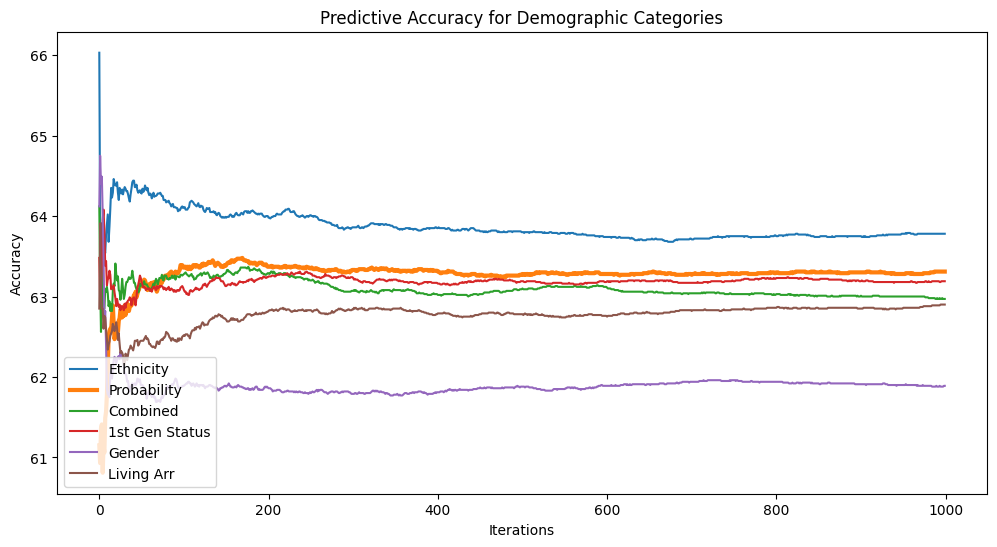

After 1000, the average success-rates and standardard deviations for the models are as follows:
ETHNICITY            Accuracy: 63.78%   Standard Deviation: 2.09
GENDER               Accuracy: 61.89%   Standard Deviation: 1.91
FIRST GEN STATUS     Accuracy: 63.19%   Standard Deviation: 1.96
LIVING ARRANGEMENT   Accuracy: 62.9%   Standard Deviation: 1.91
COMBINED             Accuracy: 62.97%   Standard Deviation: 1.98
PROBABILITY ALONE    Accuracy: 63.31%   Standard Deviation: 2.0


In [30]:
iterate_me(1000)

## Summary:
